<h2>Implement the pytorch model in keras  <br>
Model K2</h2>
Trained and tested using the MNIST dataset

# Utilities

In [1]:
##  preserntation for a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [2]:
'''Trains a simple convnet on the MNIST dataset.
'''

from __future__ import print_function
import time
from datetime import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

batch_size = 100
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 padding="same",
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

model.add(Conv2D(32, kernel_size=(5, 5), 
                 strides=(1, 1),
                 activation='relu', 
                 padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax')) 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']) 

In [4]:
# Training
start_time = datetime.now()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

# Testing
start_time = datetime.now()
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

Epoch 1/6
600/600 [==============================] - 292s 484ms/step - loss: 0.9208 - accuracy: 0.7267 - val_loss: 0.2058 - val_accuracy: 0.9482
Epoch 2/6
600/600 [==============================] - 285s 475ms/step - loss: 0.1461 - accuracy: 0.9579 - val_loss: 0.0928 - val_accuracy: 0.9726
Epoch 3/6
600/600 [==============================] - 286s 476ms/step - loss: 0.0931 - accuracy: 0.9727 - val_loss: 0.0673 - val_accuracy: 0.9799
Epoch 4/6
600/600 [==============================] - 286s 477ms/step - loss: 0.0624 - accuracy: 0.9823 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 5/6
600/600 [==============================] - 289s 481ms/step - loss: 0.0499 - accuracy: 0.9860 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 6/6
600/600 [==============================] - 209s 348ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.0420 - val_accuracy: 0.9855
Time Elapsed: 1647.64295 seconds
Test loss: 0.04198489710688591
Test accuracy: 0.9854999780654907
Time Elapsed: 3.830423 seconds


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


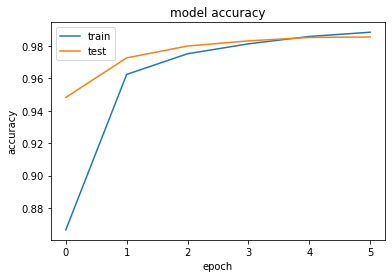

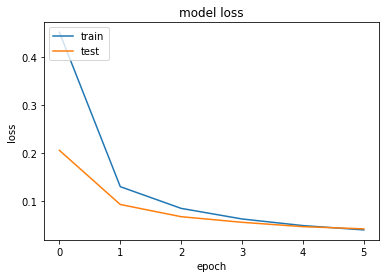

In [8]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [9]:
predictions = model.predict(x_test, verbose=0)


In [10]:


yitest = np.argmax(y_test, axis=1)

yptest = np.argmax(predictions, axis=1)
print (yitest)
print (yptest)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [11]:
## For analysis show also the confusion matrix

cfm = confusion_matrix(yitest, yptest)
print (cfm)

[[ 975    0    1    0    0    1    1    1    0    1]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   1    3 1014    0    1    0    2    6    3    2]
 [   0    0    2 1004    0    1    0    1    2    0]
 [   0    2    1    0  966    0    2    1    1    9]
 [   2    0    1    5    0  877    2    1    2    2]
 [   5    2    0    1    2    3  941    0    4    0]
 [   0    2    6    4    0    0    0 1008    2    6]
 [   2    0    6    2    2    1    0    0  957    4]
 [   2    6    0    2    4    5    0    6    3  981]]


Confusion matrix, without normalization


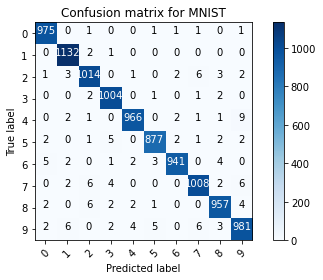

In [12]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')
